## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [152]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [153]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [154]:
len(my_docs)

1017

In [155]:
y.shape

(1017,)

In [156]:
np.unique(y, return_counts=True)

(array([1, 2]), array([1000,   17]))

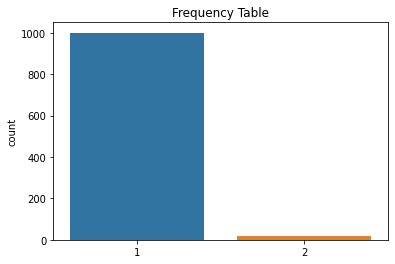

In [157]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [158]:
nltk.download('stopwords')
# collecting english stop words from nltk-library
stpw = stopwords.words('english')
    
# Adding custom stop-words
stpw.extend(['www','http','utc'])
stpw = set(stpw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
new_text = [x.decode('utf-8') for x in my_docs]

In [160]:
len(new_text)

1017

Using regex to clean the text

In [167]:
for i in range(len(new_text)) : 
  # remove special characters/symbols
  new_text[i] = re.sub(r"\n", " ", new_text[i]) 
  new_text[i] = re.sub("[\<\[].*?[\>\]]", " ", new_text[i])
  #convert text to lower-case
  new_text[i] = new_text[i].lower()
  #retain only alphabets
  new_text[i] = re.sub(r"[^a-z ]", " ", new_text[i])
  #remove words less than 3 characters
  new_text[i] = re.sub(r"\b\w{1,3}\b", " ",new_text[i])
  #remove stop-words
  new_text[i] = " ".join([x for x in new_text[i].split() if x not in stpw])

In [168]:
X = new_text

2). Create a TF IDF representation.

In [169]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')
X = vect.fit_transform(X)
X = X.toarray()

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [171]:
# Training.
NB = GaussianNB()
#your code goes here
NB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

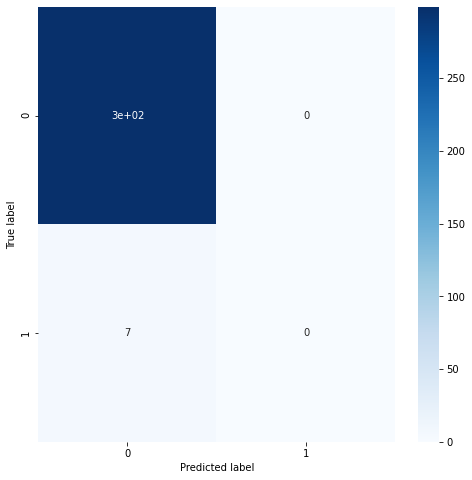

accuracy : 0.9771241830065359


In [172]:
# Testing.
Y_pred = NB.predict(X_test)
 
 #use confusion matrix 

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot=True,cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#use accuracy_score
print('accuracy :',metrics.accuracy_score(Y_test,Y_pred))